# Week 1: Relational Models & PostgreSQL
### Student ID: [B02301]
### Subtasks Done: [0,1,2,3]

## Lab Goals:
   1. Get familiar with the relational DBs.
   2. Get familiar with the relational SQL query language.
   2. Get familiar with postgreSQL as one of the most popular RDBMSs.
  

## Lab Tasks:
   0. Get familiar with Python and Jupyter Notebook.
   1. First Steps of SQL (DDL [Create DB, CREATE TABLES], DQL [SELECTIONS, PROJECTIONS, FIRLTREING, ORDERING, Different Types of JOINS,..etc], and Some DML operations [INSERTIONS, UPDATES, and DELETIONS])
   2. Create a simple Relational Database Model (MovieDB).
   3. More Query exercises with a DB ready for you, (just by running a SQL script).
   

# Task 0: Python & Jupyter Notebook & Pandas tutorial video

##### - First for Students who are not familiar with <font color='red'>Python</font>, I recommend this python full course https://www.youtube.com/watch?v=_uQrJ0TkZlc 

##### - Second, please watch the following video <font color='red'>"Jupyter Notebook Tutorial"</font> and answer the question below. Please answer the questions by writing your answer next to the red "Answer " label (the same for the other questions throught the NoteBook). Also, we recommend you to follow the examples in the video and try it out by yourself.

In [19]:
%%HTML 
<center><iframe width="600" height="315" src="https://www.youtube.com/embed/HW29067qVWk" frameborder="0" allowfullscreen></iframe>

 #### What are the advantages of using jupyter notebook?

<font color = "red"><b>Answer:</b></font> Markdowns, codes and results can be used together in a document in really understandable way. Very reader-friendly solution.

##### - Last but not least, Python Pandas 

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

- To get familiar with Pandas library you can follow this tutourial:
    - https://www.youtube.com/watch?v=vmEHCJofslg&feature=emb_rel_pause
- You can also use the follwing cheat-sheet link of pandas:
    - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


# Introduction:

### Relational DB Structure 
- A relational database consists of a collection of tables, each having a unique name.
- A row in a table represents a relationship among a set of values.
- Thus a table represents a collection of relationships. 
<img src ="https://raw.githubusercontent.com/DataSystemsGroupUT/dataeng/dataeng/attachments/attrer2.png" width ="550" height="150">


###  Structured Query Language (SQL)

<a href='https://en.wikipedia.org/wiki/SQL'>SQL </a> is used to communicate with a database. SQL is the standard language for relational database management systems. SQL statements are used to perform tasks such as update data on a database, or retrieve data from a database. 

Some common relational database management systems that use SQL are: Oracle, Sybase, Microsoft SQL Server, Access, Ingres. However, the standard SQL commands such as "Select", "Insert", "Update", "Delete", "Create", and "Drop" can be used to accomplish almost everything that one needs to do with a database. This tutorial will provide you with the instruction on the basics of each of these commands as well as allow you to put them to practice using the SQL Interpreter.

- First Steps with SQL can be followed from this <a href='https://www.sqltutorial.org/sql-cheat-sheet/'>link </a>.


### PostgreSQL:
   <a href="https://www.postgresql.org/">PostgreSQL</a> is a powerful, open source object-relational database system with over 30 years of active development that has earned it a strong reputation for reliability, feature robustness, and performance. (<b>According to official website of PostgreSQL Database</b>)<br/>
   
- PostgreSQL offecial documentation (https://www.postgresql.org/docs/9.3/index.html)
    - pdf version of last release(https://www.postgresql.org/files/documentation/pdf/12/postgresql-12-A4.pdf)

<img src="https://www.postgresql.org/media/img/about/press/elephant.png" width ="100" height="75">



# PreLab

### Installations:

#### Using Docker no need for setup

#### (Good to Know) 
##### Accessing PostgreSQL from Command Line:
- Add the PostgreSQL  installation "/home" and "/bin" directories to the enviroment variables.
- use the command ```psql -U postgres postgres``` to connect to the the by-default created database "postgres" with the user "postgres".
- Enter your set "postgres" password (i.e password of the default password that you have been asked at the time of installtion).

##### Connect To a PostgreSQL Database Server
- show you how to connect to the PostgreSQL using psql tool and pgAdmin 4 GUI tool.


#### Run the following command to install ***psycopg*** like any other Python package.

In [20]:
! pip list # verify psycopg2-binary is installed

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.9.1
bitarray                           1.4.0
bkcharts                           0.2
bleach                         

xlrd                               1.2.0
XlsxWriter                         1.2.9
xlwings                            0.19.5
xlwt                               1.3.0
xmltodict                          0.12.0
yapf                               0.30.0
zict                               2.0.0
zipp                               3.1.0
zope.event                         4.4
zope.interface                     4.7.1


### <font color='purple'>Please make sure that you have all the following packages installed: </font>

#### Run the following for importing packages that we will need throught this NB!

In [21]:
import psycopg2  #import of the psycopg2 python library
import pandas as pd #import of the pandas python library
import pandas.io.sql as psql

##No transaction is started when commands are executed and no commit() or rollback() is required. 
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Task 1: Your First Steps in PostgreSQL

### Create a simple RDB (TartuPurchases)
- The following DB Model shows an ER diagram of mock, toy DB of two tables with one relationship.
- In particular:
    - The "Customer" Table with attributes (<ins>id</ins>, name, country, email), <font color='red'>Note</font> that underline here means id is the primary_key of the "customer" table.
    - The "Order" table with attributes (<ins>id</ins>, product)
    - a (***One-many*** )relationship "makes" which relates the two tables (Customer can make several/many Orders, and Order is made by only one Customer).
    - One-to- many relationship is handled as follows in the RDBs: (Use a foreign_key on the many side of the relationship linking back to the "one" side)
    - Therefore, we add the primary key of the one side (Customer) Table as a foreign_key in the many side (Order) table.
    - Thus the Order table becomes as follows Order(id,customer_id,product) id is the primary_key and customer_id is a forien_key which references to the id primary_key in the Customer table.

#### The relational Layout: 
##### Customer(ID, Name)   --Makes--> ORDER(ID, Customer_ID,Product)
<img src='tartupurchasesDB.png'>

#### Connecting to the PostgreSQL Server

In [93]:
try:
    # Connect to the postgreSQL server with username, and password credentials
    con = psycopg2.connect(user = "postgres",
                                  password = "Riidepuu123",
                                  host = "localhost",
                                  port = "5432")
    
    con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);
    print("Connected Successfully to PostgreSQL server!!")
    
    # Obtain a DB Cursor to perform database operations
    cursor = con.cursor();
except (Exception, psycopg2.Error) as error :
     print ("Error while connecting to PostgreSQL", error)


Connected Successfully to PostgreSQL server!!


#### Create the "TarturPurchases" DB and close connection to the Server

In [23]:
#DB_name variable    
name_Database   = "TartuPurchases";

# Create DB statement
sqlCreateDatabase = "CREATE DATABASE "+name_Database+";"

try:
    # Execute a SQL command: this creates a new DB
    cursor.execute(sqlCreateDatabase);
    print("Database '"+name_Database+"' Created Successfully!")
except (Exception, psycopg2.Error) as error :
    print("Error While Creating the DB: ",error)
    
finally:
    # Close communication with the database
    cursor.close() #to close the cusrsor
    con.close() #to close the connection/ we will open a new connection to the created DB

Error While Creating the DB:  database "tartupurchases" already exists



#### Getting some details about the connection

In [24]:
con

<connection object at 0x0000028684DDD8C0; dsn: 'user=postgres password=xxx host=localhost port=5432', closed: 1>

#### You can also use the command <code>\conninfo</code> in the PSQL Shell to show the conection details

#### Upload your PSQL Shell Command Result of this command here as an a screenshot 

##### <font color='red'>Image Here:</font> 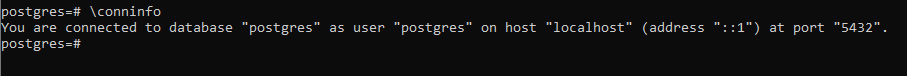

#### Get/open  a new connection, but this time pointed to the created "tartupurchases" DB.

In [25]:
# get a new connection but this time point to the created "tartupurchases" DB.
con = psycopg2.connect(user = "postgres",
                       password = "Riidepuu123", 
                       host = "localhost", #Using Docker we can refer to containers by name
                       port = "5432",
                       database = "tartupurchases")

try:
    # Obtain a new DB Cursor (to "tartupurchases" DB )
    cursor = con.cursor();
    print("connected again to the server and cusor now on tartupurchases DB !!")
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

connected again to the server and cusor now on tartupurchases DB !!


#### Creating Our First Table ("Customer")

In [26]:
#Create "Customer" Table

try:
    #table_name variable
    customerTable="customer"
    create_customerTablee_query = '''CREATE TABLE '''+ customerTable+''' 
              (id INT  PRIMARY KEY     NOT NULL,
               name           TEXT    NOT NULL,
               country        TEXT    NOT NULL,
               email          TEXT   
               ); '''

    #Execute this command (SQL Query)
    cursor.execute(create_customerTablee_query)
    
    # Make the changes to the database persistent
    con.commit()
    print("Table ("+ customerTable +") created successfully in PostgreSQL ")
except (Exception, psycopg2.Error) as error:
    # if it exits with an exception the transaction is rolled back.
    con.rollback()
    print("Error While Creating the DB: ",error)


Error While Creating the DB:  relation "customer" already exists



##### Make sure the table is created 

In [27]:
# [information_schema.tables] keep listing of every table being managed by Postgres for a particular database.
# specifying the tabel_schema to 'public' to only list tables that you create.
cursor.execute("""SELECT table_name 
                  FROM information_schema.tables 
                  WHERE table_schema = 'public'  
               """)

for table in cursor.fetchall():
    print(table)

('customer',)


#### You can also just check this from the <font color='red'>PSQL Shell</font> :
- Use the command  <code>\c  tartupurchases</code> to connect/swtich to the "pruchases" DB. 
- Use the command <code>\dt</code> to show the tables inside the current DB ("purchases").

- To get more familiar with PSQL SHELL commands, You can follow this link (https://www.postgresql.org/docs/current/app-psql.html)

#### Upload your PSQL Shell Command Result of the created tables here as an a screenshot 

##### <font color='red'>Image Here:</font> 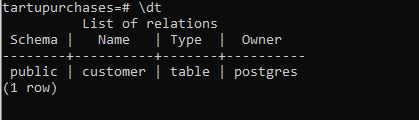

#### Show the details(description of the created table "customer")
- use the command <code>\d customer</code>

#### Upload your PSQL Shell Command Result of the decription of the customer table here:

##### <font color='red'>Image Here:</font> 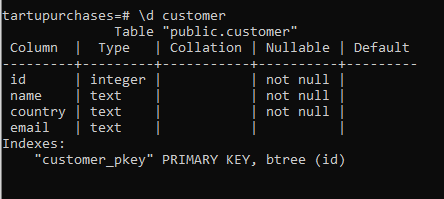

### (Let's Load some data to the table) Inserting Multiple Rows to the Table

In [28]:
sql_insert_customers = "INSERT INTO customer (id,name,country,email) VALUES(%s,%s,%s,%s)"

#list of customers (With Their attributes values)
#None here means value will be missing in the table
customer_List=[
            (1, "Mohamed Ragab", "Egypt", "mohamed.ragb@ut.ee"),
            (2,"John Smith", "Finland","j.smith@hotmail.com"),
            (3,"Aisha Kareem","India",None),
            (4,"Jean Lime","Canda","jeanlime@gmail.com"),
            (5,"Hassan Eldeeb","Egypt",None)]

try:
    # execute the INSERT statement
    cursor.executemany(sql_insert_customers,customer_List)
    # commit the changes to the database
    con.commit()
    #the number of inserted rows/tuples
    count = cursor.rowcount
    print (count, "Record inserted successfully into customers table")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)

5 Record inserted successfully into customers table


## Mock Data Generation
- If you want to generate more mock data, you can use this website (***"Mockaroo"***) (https://www.mockaroo.com/).
- "Mockaroo" lets you generate up to 1,000 rows of realistic test data in CSV, JSON, SQL, and Excel formats.
<img src='https://www.qlikfix.com/wp-content/uploads/2014/03/Mockaroo.png'>

## Querying Table Data

#### Get all the Customers in the DB

In [29]:
sql_select_query = """ SELECT * FROM customer  """

try:
    
    cursor.execute(sql_select_query, (1,))
    person_records = cursor.fetchall() 
    print("Print each row and it's columns values:\n")
    for row in person_records:
        print("Id = ", row[0], )
        print("Name = ", row[1], )
        print("Country = ", row[2], )
        print("Email = ", row[3], "\n")
except(Exception, psycopg2.Error) as error :
    con.rollback()
    print("Error:", error)

Print each row and it's columns values:

Id =  1
Name =  Mohamed Ragab
Country =  Egypt
Email =  mohamed.ragb@ut.ee 

Id =  2
Name =  John Smith
Country =  Finland
Email =  j.smith@hotmail.com 

Id =  3
Name =  Aisha Kareem
Country =  India
Email =  None 

Id =  4
Name =  Jean Lime
Country =  Canda
Email =  jeanlime@gmail.com 

Id =  5
Name =  Hassan Eldeeb
Country =  Egypt
Email =  None 



#### Notes about the Rows Fetching (Retrieval) From tables in PostgreSQL: 
- In the above example, we used **cursor.fetchall()** to get all the rows of a database table.
    -    **cursor.fetchall()** to fetch all rows.
    -    **cursor.fetchone()** to fetch single row.
    -    **cursor.fetchmany(SIZE)** to fetch limited rows.

#### You can use "Pandas" library to print the result in tabular format

In [32]:
#use Pandas to print the result in tabular form
# Don't RUN before you put your SQL Query
my_table = pd.read_sql('SELECT * FROM customer', con)
display(my_table.style.hide_index())

id,name,country,email
1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee
2,John Smith,Finland,j.smith@hotmail.com
3,Aisha Kareem,India,None
4,Jean Lime,Canda,jeanlime@gmail.com
5,Hassan Eldeeb,Egypt,None


In [33]:
#OR using this code
# Don't RUN before you put your SQL Query
another_attempt= psql.read_sql("SELECT * FROM customer", con)
display(another_attempt.style.hide_index())

id,name,country,email
1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee
2,John Smith,Finland,j.smith@hotmail.com
3,Aisha Kareem,India,None
4,Jean Lime,Canda,jeanlime@gmail.com
5,Hassan Eldeeb,Egypt,None


#### Get only the <font color='red'>names</font>  and <font color='red'>countries</font> of all the Customers in the DB [Projection]

In [34]:
# Don't RUN before you put your SQL Query
sql_project_query = """ SELECT name, country FROM customer"""

projected_DF= psql.read_sql(sql_project_query, con)
display(projected_DF.style.hide_index())

name,country
Mohamed Ragab,Egypt
John Smith,Finland
Aisha Kareem,India
Jean Lime,Canda
Hassan Eldeeb,Egypt


## Sorting the Results

#### Get All Customers , sorted by country Ascednding

In [35]:
ord_customers_by_country= psql.read_sql("SELECT * FROM customer ORDER BY country ASC", con)
display(ord_customers_by_country.style.hide_index())

id,name,country,email
4,Jean Lime,Canda,jeanlime@gmail.com
1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee
5,Hassan Eldeeb,Egypt,None
2,John Smith,Finland,j.smith@hotmail.com
3,Aisha Kareem,India,None


- **Note**: By Default Sorting in SQL is Ascending order!

#### Get All Customers , sorted by names Descednding

In [36]:
# Don't RUN before you put your SQL Query
ord_customers_by_name= psql.read_sql("SELECT * FROM customer ORDER BY name DESC", con)
display(ord_customers_by_name.style.hide_index())

id,name,country,email
1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee
2,John Smith,Finland,j.smith@hotmail.com
4,Jean Lime,Canda,jeanlime@gmail.com
5,Hassan Eldeeb,Egypt,None
3,Aisha Kareem,India,None


#### Get Distinct Countries of customers From Customer table 

In [37]:
# Don't RUN before you put your SQL Query
distinctCountries= psql.read_sql("SELECT DISTINCT country from customer", con)
display(distinctCountries.style.hide_index())

country
Finland
Egypt
India
Canda


### Filtering the Results (Use the WHERE & AND)

#### Get only the customers who have emails (filter out who don't have)

In [38]:
customersWithEmails= psql.read_sql("SELECT * FROM customer WHERE email != ''  ", con)
display(customersWithEmails.style.hide_index())

id,name,country,email
1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee
2,John Smith,Finland,j.smith@hotmail.com
4,Jean Lime,Canda,jeanlime@gmail.com


#### Get customers who live in "Egypt"

In [43]:
# Don't RUN before you put your SQL Query
theEgyptian= psql.read_sql("SELECT * FROM customer "
                           "WHERE country='Egypt'  ", con)
display(theEgyptian.style.hide_index())

id,name,country,email
1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee
5,Hassan Eldeeb,Egypt,None


#### Get customers who are from Egypt and already have emails

In [71]:
# Don't RUN before you put your SQL Query
theEgyptianWithEmail= psql.read_sql("""SELECT * FROM customer
                                    WHERE country='Egypt'
                                    AND email IS NOT NULL """, con)
display(theEgyptianWithEmail.style.hide_index())

id,name,country,email
1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee


#### Get customers who's name starts with Letter "J"

In [46]:
J_Customers= psql.read_sql("SELECT * FROM customer WHERE name LIKE 'J%' ", con)
display(J_Customers.style.hide_index())

id,name,country,email
2,John Smith,Finland,j.smith@hotmail.com
4,Jean Lime,Canda,jeanlime@gmail.com


### Pagination  in SQL, using "LIMT" and "OFFSET"

#### Get only the first 3 Customers from the customers table

In [53]:
first_3_Customers= psql.read_sql("SELECT * FROM customer LIMIT 3 ", con)
display(first_3_Customers.style.hide_index())

id,name,country,email
1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee
2,John Smith,Finland,j.smith@hotmail.com
3,Aisha Kareem,India,None


#### skipt the First 3 Customers and get the next 3 customers

In [54]:
next_3_Customers= psql.read_sql("SELECT * FROM customer OFFSET 3 LIMIT 3 ", con)
display(next_3_Customers.style.hide_index())

id,name,country,email
4,Jean Lime,Canda,jeanlime@gmail.com
5,Hassan Eldeeb,Egypt,None


#### Try another way to ge the same result of the previous cell
- **Hint** : use OFFSET with FETCH FIRST

In [66]:
#OR you can do the same using the following Query
# Don't RUN before you put your SQL Query
next_3_Customers= psql.read_sql("SELECT * FROM customer OFFSET 3 FETCH FIRST 3 ROWS ONLY", con)
display(next_3_Customers.style.hide_index())

id,name,country,email
4,Jean Lime,Canda,jeanlime@gmail.com
5,Hassan Eldeeb,Egypt,None


## Let's have some statiscs and aggregations (SQL GROUP BY & aggregation functions)

- The GROUP BY statement groups rows that have the same values into summary rows.
- The GROUP BY statement is often used with aggregate functions (COUNT, MAX, MIN, SUM, AVG) to group the result-set by one or more columns.


#### Get the count of  customers in your DB

In [68]:
# Don't RUN before you put your SQL Query
Customers_Cnt= psql.read_sql("SELECT COUNT(*) FROM customer", con)
display(Customers_Cnt.style.hide_index())

count
5


#### Get the Distinct Countries and how many customers are in each country

In [69]:
Countries_Customers_Cnt= psql.read_sql("SELECT DISTINCT country , COUNT (*) FROM customer GROUP BY country", con)
display(Countries_Customers_Cnt.style.hide_index())

country,count
India,1
Canda,1
Finland,1
Egypt,2


#### Get the Distinct Countries and how many people are in each country, and filter the count to be greater than 1

In [70]:
### USE of HAVING with GROUP BY and Aggregation Functions
Countries_Customers_Cnt_gt1= psql.read_sql("""SELECT DISTINCT country , COUNT (*) 
                                          FROM customer 
                                          GROUP BY country 
                                          HAVING count(*)>1
                                          """, con)
display(Countries_Customers_Cnt_gt1.style.hide_index())

country,count
Egypt,2


##### Give an Alias for the count (change it to be Customers_number)

In [72]:
# Don't RUN before you put your SQL Query
Countries_Customers_Cnt_gt1= psql.read_sql(
    """SELECT DISTINCT country , COUNT (*) as "Customers_number"
                                          FROM customer 
                                          GROUP BY country 
                                          HAVING count(*)>1
                                          """, con)
display(Countries_Customers_Cnt_gt1.style.hide_index())

country,Customers_number
Egypt,2


##### We're going to leave link here for more details about the other aggregate functions such as (MIN, MAX, SUM,...)
PostgreSQL Aggregates: https://www.postgresql.org/docs/9.5/functions-aggregate.html

### Let's Create the Second Table (Order)
- ***Reminder: One-to-many*** relationship is handled as follows : Use a foreign key on the many side of the relationship linking back to the "one" side.
- ***Note:*** Order is a reserved keyword in SQL, It's not recommended to use such keywords, but if you want to do so, we can use double quoutes "" arrount those keywords.

In [73]:
#Create Order Table

try:
    ordersTable="order"
    create_ordersTable_query = '''CREATE TABLE "'''+ ordersTable+'''" 
              (id INT  PRIMARY KEY,
               customer_id  INT  REFERENCES customer(id),
               product      TEXT    NOT NULL
               ); '''

    
    #Execute this command (SQL Query)
    cursor.execute(create_ordersTable_query)
    con.commit()
    print("Table ("+ ordersTable +") created successfully in PostgreSQL ")
except:
    con.rollback()
    print("Table ("+ ordersTable +") already Existed! ")

Table (order) created successfully in PostgreSQL 


#### Can we create this table (Order) before the (customer) table? (YES/NO, and Why)?!

<font color='red'>***Answer:***</font> We need to have the customer_id reference to customer.id field.

#### Insert Some Data into the (Order) Table

In [74]:
sql_insert_orders = '''INSERT INTO "order" (id,customer_id,product) VALUES(%s,%s,%s)'''

#list of customers
orders_List=[
        (1,1, "Coffee - Irish Cream"),
        (2,1, "Sauce - Demi Glace"),
        (3,2,"Corn Meal"),
        (4,1,"Cumin - Whole"),
        (5,3,"Chocolate - Sugar Free Semi Choc"),
        (6,4,"Rolled Oats")]
try:
    # execute the INSERT statement
    cursor.executemany(sql_insert_orders,orders_List)
    # commit the changes to the database
    con.commit()

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while exccuting the query at PostgreSQL",error)
    
finally:
    
    count = cursor.rowcount
    print (count, "Record inserted successfully into customers table")

6 Record inserted successfully into customers table


## Bring Data from multiple Tables (SQL JOINS)

#### What are SQL Joins?

An SQL JOIN clause combines rows from two or more tables. It creates a set of rows in a temporary table. 

#### How to Join two tables in SQL?
- A JOIN works on two or more tables if they have at least one common field and have a relationship between them.

- JOIN keeps the base tables (structure and data) unchanged.

#### Looking only at "order" Table, we don't know names (or any further details of the csuomers)
- Here'is the role of JOINS Comes to the Scene :) 

In [75]:
orders= psql.read_sql('''SELECT * FROM "order" ''', con)
display(orders.style.hide_index())

id,customer_id,product
1,1,Coffee - Irish Cream
2,1,Sauce - Demi Glace
3,2,Corn Meal
4,1,Cumin - Whole
5,3,Chocolate - Sugar Free Semi Choc
6,4,Rolled Oats


#### INNER JOIN

- The SQL INNER JOIN is similar to the Set intersection.
- INNER JOIN selects rows from table1 and table2 where they match the selecting column.


In [76]:
innerJoined= psql.read_sql("""SELECT * FROM customer 
                              INNER JOIN  "order" 
                              ON customer.id = "order".customer_id
                              ORDER BY name DESC
                      """, con)
display(innerJoined)

,id,name,country,email,id,customer_id,product
0,1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee,1,1,Coffee - Irish Cream
1,1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee,2,1,Sauce - Demi Glace
2,1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee,4,1,Cumin - Whole
3,2,John Smith,Finland,j.smith@hotmail.com,3,2,Corn Meal
4,4,Jean Lime,Canda,jeanlime@gmail.com,6,4,Rolled Oats
5,3,Aisha Kareem,India,None,5,3,Chocolate - Sugar Free Semi Choc


#### If it's Confusing Just show the name and the product

In [79]:
innerJoined= psql.read_sql(""" SELECT C.name, O.product
FROM customer C 
INNER JOIN "order" O ON (C.id = O.customer_id)
ORDER BY name DESC""", con)
display(innerJoined)

,name,product
0,Mohamed Ragab,Coffee - Irish Cream
1,Mohamed Ragab,Sauce - Demi Glace
2,Mohamed Ragab,Cumin - Whole
3,John Smith,Corn Meal
4,Jean Lime,Rolled Oats
5,Aisha Kareem,Chocolate - Sugar Free Semi Choc


###  LEFT JOIN

- This selects all rows from the table1 ( on the left), the rows from the  table2 (on the right) if they match.
- If they don’t match, the data for the right table is blank (NULLS).

#### Get all the customers with Orders details, even get customers who don't made orderes 
- Other way to say! Get all the customers, and Products , and if the customer didn't order product the product will be blank

In [80]:
leftJoined= psql.read_sql("""SELECT *  FROM customer 
                        LEFT JOIN  "order" 
                        ON customer.id = "order".customer_id
                        ORDER BY name DESC
                      """, con)
display(leftJoined)

,id,name,country,email,id,customer_id,product
0,1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee,4.0,1.0,Cumin - Whole
1,1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee,2.0,1.0,Sauce - Demi Glace
2,1,Mohamed Ragab,Egypt,mohamed.ragb@ut.ee,1.0,1.0,Coffee - Irish Cream
3,2,John Smith,Finland,j.smith@hotmail.com,3.0,2.0,Corn Meal
4,4,Jean Lime,Canda,jeanlime@gmail.com,6.0,4.0,Rolled Oats
5,5,Hassan Eldeeb,Egypt,None,NaN,NaN,None
6,3,Aisha Kareem,India,None,5.0,3.0,Chocolate - Sugar Free Semi Choc


#### perform the same query but projecting on customer_name and the products 

In [81]:
#the same query but projecting on customer_name  and the products 
leftJoined= psql.read_sql("""SELECT name, product FROM customer 
                        LEFT JOIN  "order" 
                        ON customer.id = "order".customer_id
                        ORDER BY name DESC
                      """, con)
display(leftJoined)

,name,product
0,Mohamed Ragab,Cumin - Whole
1,Mohamed Ragab,Sauce - Demi Glace
2,Mohamed Ragab,Coffee - Irish Cream
3,John Smith,Corn Meal
4,Jean Lime,Rolled Oats
5,Hassan Eldeeb,None
6,Aisha Kareem,Chocolate - Sugar Free Semi Choc


### RIGHT JOIN
- Opposite to LEFT JOIN
- This selects all the rows from the table on the right, and then rows from the left if they match.
- If they don’t match, the data for the table on the left is blank (NULLS).


##### Now, we insert one product that doen't have customer to buy (don't make alot of sense, but just for the example!!)

In [82]:
postgres_insert_query = """ INSERT INTO "order" (id,customer_id,product) VALUES (%s,%s,%s)"""
record_to_insert = (7,None,'Dark Choclate')

try:
    cursor.execute(postgres_insert_query, record_to_insert)
    con.commit()
except (Exception, psycopg2.Error) as error :
    con.rollback()
    print("ERROR",error)
    
count = cursor.rowcount
print (count, "Record inserted successfully into person table")

1 Record inserted successfully into person table


#### Perform the same query but projecting on customer_name and the products 

In [83]:
RightJoined= psql.read_sql("""SELECT name, product FROM customer 
                        RIGHT JOIN  "order" 
                        ON customer.id = "order".customer_id
                        ORDER BY name DESC
                      """, con)
display(RightJoined)

,name,product
0,None,Dark Choclate
1,Mohamed Ragab,Sauce - Demi Glace
2,Mohamed Ragab,Coffee - Irish Cream
3,Mohamed Ragab,Cumin - Whole
4,John Smith,Corn Meal
5,Jean Lime,Rolled Oats
6,Aisha Kareem,Chocolate - Sugar Free Semi Choc


### FULL JOIN
- This selects all rows from both tables, matching them if there is a match on the selecting column.

- Think of it as a LEFT and a RIGHT join.


In [84]:
fullJoined= psql.read_sql("""SELECT name, product FROM customer 
                             FULL JOIN  "order" 
                             ON customer.id = "order".customer_id
                             ORDER BY name DESC """, con)
display(fullJoined)

,name,product
0,None,Dark Choclate
1,Mohamed Ragab,Sauce - Demi Glace
2,Mohamed Ragab,Cumin - Whole
3,Mohamed Ragab,Coffee - Irish Cream
4,John Smith,Corn Meal
5,Jean Lime,Rolled Oats
6,Hassan Eldeeb,None
7,Aisha Kareem,Chocolate - Sugar Free Semi Choc


## Task 2: Create another RDB model (MovieDB)

This is another DB about movies and actors who played roles in these movies. Particularly, this DB is consisted of the following tables:  

- A ***"Person"*** table who has a unique **id**, and another **name** field.
- Another ***"Movie"*** table that has a unique **id**, a **title**, a **country** where it was made, and a **year** when it was released.

- There is (***m-n**) or ***"many-many"** relationship between these two tables (i.e basically, many actors can act in many movies, and the movie include many actors).
- ***Many-to-many*** are handeled as follows: We have to use a ***junction table** (<font color='green'>example</font>: https://gist.github.com/anonymous/79c2eed2a634777b16ff)
- Therefore, we use the **"Roles"** table in which we can deduct which person has acted in which movie, and what role(s) they played in this movie.


#### Use one of the drawing tools to plot an ER model of this described DB
- you can use the mentioned ER diagramitic tool in lecture slides (link: https://erdplus.com/)

##### <font color='red'>YOUR DB SCHEMA IMAGE HERE: </font> 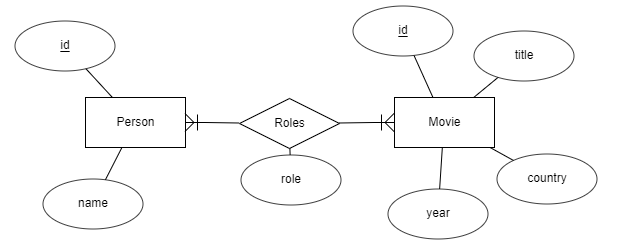

#### Create the MovieDB 

In [94]:
name_Database = "MovieDB";

sqlCreateDatabase = "CREATE DATABASE "+name_Database+";"

try:
    # Execute a SQL command: this creates a new DB
    cursor.execute(sqlCreateDatabase);
    print("Database '"+name_Database+"' Created Successfully!")
except (Exception, psycopg2.Error) as error :
    print("Error While Creating the DB: ",error)

Error While Creating the DB:  database "moviedb" already exists



In [190]:
psql.read_sql("DROP TABLE person", con)

TypeError: 'NoneType' object is not iterable

#### Creating  the Movie Table

In [191]:
try:
    MovieTable="movie"
    create_m_query = '''CREATE TABLE '''+ MovieTable+''' 
              (id INT  PRIMARY KEY     NOT NULL,
               title           TEXT    ,
               country        TEXT    ,
               year          INT   
               ); '''

    #Execute this command (SQL Query)
    cursor.execute(create_m_query)
    
    # Make the changes to the database persistent
    con.commit()
    print("Table ("+ MovieTable +") created successfully in PostgreSQL ")
except (Exception, psycopg2.Error) as error:
    # if it exits with an exception the transaction is rolled back.
    con.rollback()
    print("Error While Creating the DB: ",error)


Table (movie) created successfully in PostgreSQL 


#### Creating  the "Person" Table

In [192]:
try:
    Table="person"
    create_query = '''CREATE TABLE '''+ Table+''' 
              (id INT  PRIMARY KEY     NOT NULL,
               name           TEXT      
               ); '''

    #Execute this command (SQL Query)
    cursor.execute(create_query)
    
    # Make the changes to the database persistent
    con.commit()
    print("Table ("+ Table +") created successfully in PostgreSQL ")
except (Exception, psycopg2.Error) as error:
    # if it exits with an exception the transaction is rolled back.
    con.rollback()
    print("Error While Creating the DB: ",error)


Table (person) created successfully in PostgreSQL 


#### Creating  the "Roles" relationship Table

In [193]:
try:
    Table="roles"
    create_query = '''CREATE TABLE '''+ Table+''' 
              (movie_id INT  REFERENCES movie(id),
               person_id INT REFERENCES person(id),
               role TEXT
               ); '''

    #Execute this command (SQL Query)
    cursor.execute(create_query)
    
    # Make the changes to the database persistent
    con.commit()
    print("Table ("+ Table +") created successfully in PostgreSQL ")
except (Exception, psycopg2.Error) as error:
    # if it exits with an exception the transaction is rolled back.
    con.rollback()
    print("Error While Creating the DB: ",error)

Table (roles) created successfully in PostgreSQL 


### Data Insertions

Please, use the following demo datasets for allocating some data in the tables

- **Person Table**:
        id,name
        1,Charlie Sheen
        2,Michael Douglas
        3,Martin Sheen
        4,Morgan Freeman

- ***Movie Table***:
        id,title,country,year
        1,Wall Street,USA,1987
        2,The American President,USA,1995
        3,The Shawshank Redemption,USA,1994

- ***Roles Relationship*** (<font color='green'>Conjunction Table</font>):
        personId,movieId,role
        1,1,Bud Fox
        2,1,Carl Fox
        3,1,Gordon Gekko
        2,2,A.J. MacInerney
        3,2,President Andrew Shepherd
        4,3,Ellis Boyd 'Red' Redding

#### Insert Data to the Person Table

In [194]:
sql_insert = "INSERT INTO person (id,name) VALUES(%s,%s)"

List=[
  (1,"Charlie Sheen"),
  (2,"Michael Douglas"),
  (3,"Martin Sheen"),
  (4,"Morgan Freeman")]

try:
    cursor.executemany(sql_insert,List)
    con.commit()
    count = cursor.rowcount
    print ("Successfully added ", count, "new records")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)

Successfully added  4 new records


#### Insert Data to the Movie Table

In [195]:
sql_insert = "INSERT INTO movie (id, title, country, year) VALUES(%s,%s,%s,%s)"

List=[
  (1,"Wall Street","USA",1987),
  (2,"The American President","USA",1995),
  (3,"The Shawshank Redemption","USA",1994)]

try:
    cursor.executemany(sql_insert,List)
    con.commit()
    count = cursor.rowcount
    print ("Successfully added ", count, "new records")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)

Successfully added  3 new records


#### Insert Data to the Roles Table

In [196]:
sql_insert = "INSERT INTO roles (person_id, movie_id, role) VALUES(%s,%s,%s)"

List=[
  (1,1,"Bud Fox"),
  (2,1,"Carl Fox"),
  (3,1,"Gordon Gekko"),
  (2,2,"A.J. MacInerney"),
  (3,2,"President Andrew Shepherd"),
  (4,3,"Ellis Boyd 'Red' Redding")]

try:
    cursor.executemany(sql_insert,List)
    con.commit()
    count = cursor.rowcount
    print ("Successfully added ", count, "new records")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)

Successfully added  6 new records


#### Get all Actors (Persons) from the movie DB

In [197]:
my_table= pd.read_sql("""SELECT DISTINCT name FROM person""", con)
display(my_table.style.hide_index())

name
Morgan Freeman
Martin Sheen
Michael Douglas
Charlie Sheen


#### Get All Movies , sorted from recent to old

In [198]:
moviesOrdered = pd.read_sql(''' SELECT DISTINCT title, year FROM movie ORDER BY year DESC''', con)
display(moviesOrdered.style.hide_index())

title,year
The American President,1995
The Shawshank Redemption,1994
Wall Street,1987


#### Get All Movies released in the 90s (after year (1990) and before 2000) ordered from old to recent.

In [221]:
movies90 = pd.read_sql(''' SELECT * FROM movie WHERE year between 1991 and 1999 ORDER BY year DESC  ''', con)
display(movies90.style.hide_index())

id,title,country,year,tagline
4,The Matrix,None,1999,Welcome to the Real World
2,The American President,USA,1995,None
3,The Shawshank Redemption,USA,1994,None


#### Get Movies and Actors from your  "movies" DB

In [200]:
moviesActors = pd.read_sql(''' SELECT p.name, m.title
FROM person p 
INNER JOIN roles r ON (p.id = r.person_id)
INNER JOIN movie m ON (r.movie_id = m.id)''', con)

display(moviesActors.style.hide_index())

name,title
Charlie Sheen,Wall Street
Michael Douglas,Wall Street
Martin Sheen,Wall Street
Michael Douglas,The American President
Martin Sheen,The American President
Morgan Freeman,The Shawshank Redemption


#### Get count of "Movies" in your DB

In [201]:
count_table= pd.read_sql('SELECT COUNT(*) FROM movie ', con)
display(count_table.style.hide_index())

count
3


#### In this DB, for every "Actor" get the number of movies he played

In [202]:
actorMoviesAgg= pd.read_sql(""" SELECT p.name, count(m.title) as "Nbr of movies"
FROM person p 
INNER JOIN roles r ON (p.id = r.person_id)
INNER JOIN movie m ON (r.movie_id = m.id)
GROUP BY 1""", con)
display(actorMoviesAgg.style.hide_index())

name,Nbr of movies
Morgan Freeman,1
Martin Sheen,2
Michael Douglas,2
Charlie Sheen,1


#### In this DB, List the movies that every Actor Played
<b>Hint:</b> use the aggregation function <b>"ARRAY_AGG"</b> to group movies as a list.

In [222]:
actorMoviesAggList= pd.read_sql(""" SELECT p.name, ARRAY_AGG(m.title) as "List of movies"
FROM person p 
INNER JOIN roles r ON (p.id = r.person_id)
INNER JOIN movie m ON (r.movie_id = m.id)
GROUP BY 1""", con)
display(actorMoviesAggList.style.hide_index())

name,List of movies
Morgan Freeman,['The Shawshank Redemption']
Martin Sheen,['The American President']
Michael Douglas,['The American President']


### UPDATE Table Data

#### Update the year of production of the movie "Wall Street" to be 2000 instead of it's current year. Show the record before and after the update.

In [219]:
old_table = pd.read_sql("SELECT * FROM movie WHERE title = 'Wall Street'", con)
display("Before: ", old_table.style.hide_index())

update_value = """UPDATE movie SET year=2000 WHERE title='Wall Street' """
try:
    cursor.execute(update_value)
    con.commit()
except (Exception, psycopg2.Error) as error :
    con.rollback()
    print("ERROR",error)

new_table = pd.read_sql("SELECT * FROM movie WHERE title = 'Wall Street'", con)
display("Now: ", new_table.style.hide_index())

'Before: '

id,title,country,year,tagline


'Now: '

id,title,country,year,tagline


## Delete Table rows

#### Delete the movie with id =1 , and show the person table before and after the deletion.

In [205]:
old_table = pd.read_sql("SELECT * FROM person", con)
display("Before: ", old_table.style.hide_index())

delete_entry = """DELETE FROM roles WHERE movie_id=1 """
try:
    cursor.execute(delete_entry)
    con.commit()
except (Exception, psycopg2.Error) as error :
    con.rollback()
    print("ERROR",error)
    
delete_entry = """DELETE FROM movie WHERE id=1 """
try:
    cursor.execute(delete_entry)
    con.commit()
except (Exception, psycopg2.Error) as error :
    con.rollback()
    print("ERROR",error)

new_table = pd.read_sql("SELECT * FROM person", con)
display("Now: ", new_table.style.hide_index())

'Before: '

id,name
1,Charlie Sheen
2,Michael Douglas
3,Martin Sheen
4,Morgan Freeman


'Now: '

id,name
1,Charlie Sheen
2,Michael Douglas
3,Martin Sheen
4,Morgan Freeman


## Extend you "Movies" DB 

Imagine now that we are going to extend our DB with new movies, actors, even with new directors.

- We add <b>**"The matrix"**</b> movie which was released in <b>(1999)</b>, and has a new property "Tagline" <b>("Welcome to the Real World")</b>.
    - <font color='red'> Adding the "Tagline" new property (attribute) require changing the table schema</font>

- We will also add 4 new actors (Person):
    - **"Keanu Reeves"** who was born in (1964). Note "born" property is also new.
    - **"Carrie-Anne Moss"** who was born in (1967).
    - **"Laurence Fishburne"** who was born in (1960).
    - **"Hugo Weaving"** who was born in (1960).
    * <font color='red'> **Note**: Adding the new "born" Property require changing the table schema</font>    
- Moreover, we add 2 directors (Person) :
    - **"Lilly Wachowski"**, born in (1967)
    - **"Lana Wachowski"**, born in(1965)
- For these directors specify one more Label ("Director").
    - <font color='red'> This new Label Will require **"Denormalization"** Or smothing</font>
    
- We will also Create a new <b>RelationType "DIRECTED" </b> that is directed from the later 3 director to "the Matrix" movie.
    - - <font color='red'> New created table for **Directed** relationship </font>

#### Adding Tagline column to the movie table requires, altering the table schema

In [206]:
psql.read_sql("""ALTER TABLE movie ADD tagline TEXT""", con)

TypeError: 'NoneType' object is not iterable

#### Inserting the new movie "The Matrix" with the prementioned attributes to movie table

In [207]:
insert_query = """ INSERT INTO movie (id, title, country, year, tagline) VALUES (%s,%s,%s,%s,%s)"""
record_to_insert = (4,"The Matrix",None, 1999, "Welcome to the Real World")

try:
    cursor.execute(insert_query, record_to_insert)
    con.commit()
except (Exception, psycopg2.Error) as error :
    con.rollback()
    print("ERROR",error)

#### Adding 'born' column to the person table also requires, altering the table schema

In [209]:
psql.read_sql("""ALTER TABLE person ADD born INT""", con)

TypeError: 'NoneType' object is not iterable

#### Inserting the  "4" more Actors.

In [210]:
sql_insert = "INSERT INTO person (id,name, born) VALUES(%s,%s,%s)"

List=[
(5, "Keanu Reeves",1964),
(6, "Carrie-Anne Moss",1967),
(7, "Laurence Fishburne",1960),
(8, "Hugo Weaving",1960)
]

try:
    cursor.executemany(sql_insert,List)
    con.commit()
    count = cursor.rowcount
    print ("Successfully added ", count, "new records")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)
    


Successfully added  4 new records


#### Inserting the  "2" Directors

In [212]:
sql_insert = "INSERT INTO person (id,name, born) VALUES(%s,%s,%s)"

List=[
(9,  "Lilly Wachowski", 1967),
(10, "Lana Wachowski", 1965)
]

try:
    cursor.executemany(sql_insert,List)
    con.commit()
    count = cursor.rowcount
    print ("Successfully added ", count, "new records")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)

Successfully added  2 new records


#### Specifying this new Label ("Director") will require "normalization"

I highly suggest modeling this a little more "normalized". You are already on the right track by realizing that both "Directors" and maybe after that "Actors" are the same entity (Person). The trick is that you should model "roles", and then model user's roles as well. That makes 3 total tables for this small portion of your model.

<img src= 'NormalizationTrick.JPG'>

In [223]:
try:
    Table="label"
    create_query = '''CREATE TABLE '''+ Table+''' 
              (id INT PRIMARY KEY,
              label TEXT
               ); '''

    #Execute this command (SQL Query)
    cursor.execute(create_query)
    
    # Make the changes to the database persistent
    con.commit()
    print("Table ("+ Table +") created successfully in PostgreSQL ")
except (Exception, psycopg2.Error) as error:
    # if it exits with an exception the transaction is rolled back.
    con.rollback()
    print("Error While Creating the DB: ",error)

Table (label) created successfully in PostgreSQL 


In [225]:
try:
    Table="person_label"
    create_query = '''CREATE TABLE '''+ Table+''' 
              (person_id INT  REFERENCES person(id),
              label_id INT  REFERENCES label(id)
               ); '''

    #Execute this command (SQL Query)
    cursor.execute(create_query)
    
    # Make the changes to the database persistent
    con.commit()
    print("Table ("+ Table +") created successfully in PostgreSQL ")
except (Exception, psycopg2.Error) as error:
    # if it exits with an exception the transaction is rolled back.
    con.rollback()
    print("Error While Creating the DB: ",error)

Table (person_label) created successfully in PostgreSQL 


#### Insert Data into the two new normalized tables ("Person_label", and "Label") 

In [243]:
sql_insert1 = "INSERT INTO label (id, label) VALUES(%s,%s)"

List1=[
(1,  "Actor"),
(2, "Director")
]

try:
    cursor.executemany(sql_insert1,List1)
    con.commit()
    count = cursor.rowcount
    print ("Successfully added ", count, "new records")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)

sql_insert2 = "INSERT INTO person_label (person_id,label_id) VALUES(%s,%s)"

query= "SELECT id FROM person"
try:
    cursor.execute(query, (1,))
    person_ids = cursor.fetchall() 

    List2=[]
    for row in person_ids:
        id = row[0]
        if id == 9 or id == 10:
            List2.append([id, 2])
        else:
            List2.append([id, 1])
except(Exception, psycopg2.Error) as error :
    con.rollback()
    print("Error:", error)
    
    

try:
    cursor.executemany(sql_insert2,List2)
    con.commit()
    count = cursor.rowcount
    print ("Successfully added ", count, "new records")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)

Error while Inserting the data to the table, Details:  duplicate key value violates unique constraint "label_pkey"
DETAIL:  Key (id)=(1) already exists.

Successfully added  10 new records


#### Perform a query that shows only the "Directors"

In [246]:
directors=psql.read_sql("""SELECT p.name FROM person p
INNER JOIN person_label pl ON (p.id = pl.person_id)
INNER JOIN label l ON (pl.label_id = l.id)
WHERE l.label = 'Director' """, con)
display(directors.style.hide_index())

name
Lilly Wachowski
Lana Wachowski


#### "Directed" Relationship creation

In [248]:
try:
    Table="directed"
    create_query = '''CREATE TABLE '''+ Table+''' 
              (movie_id INT  REFERENCES movie(id),
               person_id INT REFERENCES person(id)
               ); '''

    #Execute this command (SQL Query)
    cursor.execute(create_query)
    
    # Make the changes to the database persistent
    con.commit()
    print("Table ("+ Table +") created successfully in PostgreSQL ")
except (Exception, psycopg2.Error) as error:
    # if it exits with an exception the transaction is rolled back.
    con.rollback()
    print("Error While Creating the DB: ",error)

Table (directed) created successfully in PostgreSQL 


#### Insert data to the "Directed" table 

In [254]:
sql_insert = "INSERT INTO directed (movie_id, person_id) VALUES(%s,%s)"

query= "SELECT id FROM movie WHERE title='The Matrix'"
try:
    cursor.execute(query, (1,))
    movie_id = cursor.fetchone() 

    List=[
    (movie_id,  9),
    (movie_id, 10)
    ]

except(Exception, psycopg2.Error) as error :
    con.rollback()
    print("Error:", error)


try:
    cursor.executemany(sql_insert,List)
    con.commit()
    count = cursor.rowcount
    print ("Successfully added ", count, "new records")

except (Exception, psycopg2.Error) as error :
    con.rollback()
    print ("Error while Inserting the data to the table, Details: ",error)


Successfully added  2 new records


### Perform a query that get persons who Directed "The matrix" movie.

In [258]:
matrix=psql.read_sql("""SELECT m.title, p.name as "Director" FROM person p
INNER JOIN directed d ON (p.id = d.person_id)
INNER JOIN movie m ON (d.movie_id = m.id)
WHERE m.title ='The Matrix' """, con)
display(matrix.style.hide_index())


title,Director
The Matrix,Lilly Wachowski
The Matrix,Lana Wachowski


## Task 3 (Tartu Country Club): 

- The DB  centered arround a **"country club"**, with a set of **members**, **facilities** such as tennis courts, and booking history for those facilities. 
- Amongst other things, the club wants to understand how they can use their information to analyze facility usage/demand.

<img src="DBSchema.JPG">

#### From the above schema Diagram, answer the following questions:
- What is the relationship type(i.e. nature) between the **"memebers"** and **"facilities"** tables?

##### <font color='green'>Answer: </font> many to many . 

- Mention How was this relationship handled ? 

##### <font color='green'>Answer: </font> Relationship was handled by adding booking relation in between.

- Mention what are the keys (PRIMARY, FORIEN,..) in all the three tables (DB schema).

##### <font color='green'>Answer: </font>
members: primary key = memid, foreign key = recommendedby

bookings: foreign keys: memid, facid

facilities: primary key = facid


- What is the Degree of each Table in the above DB schema?

##### <font color='green'>Answer: </font>
members: 8

bookings: 4

facilities: 6

#### Use the attached  <font color='green'> "clubdata.sql" </font> script to create DB , tables, and insert data in the created tables.
- login to your postgres command line as shown above.
- use the command in your ***PSQL SHELL***  <code>\i 'your/path/clubdata.sql'</code> to run the script.

#### Use SQL commands using python like in this jupyter note book, or use "PgAdmin" to answer the following:

#### Get a list of all of the facilities and their cost to members.

In [262]:
select "name", membercost from cd.facilities

SyntaxError: invalid syntax (<ipython-input-262-9806a7154d73>, line 1)

#### How can you produce a list of facilities that charge a fee to members (membercost>0)?

In [ ]:
select "name" from cd.facilities
where membercost > 0

####  How can you produce a list of all facilities with the word 'Tennis' in their name?

In [ ]:
select "name" from cd.facilities
where lower("name") like '%tennis%'

#### How can you retrieve the details of facilities with ID 1 and 5? <font color=red>Try to do it without using the OR operator.</font>

In [ ]:
select * from cd.facilities
where facid in (1,5)

####  How can you produce a list of facilities, with each labelled as 'cheap' or 'expensive' depending on if their monthly maintenance cost is more than $100? Return the name and monthly maintenance of the facilities in question. 

In [ ]:
select name, 
case when monthlymaintenance > 100 then 'expensive'
else 'cheap' end as "maintenance",
monthlymaintenance
from cd.facilities

####  get the signup date of your last member. How can you retrieve this information? 

In [ ]:
select max(joindate) from cd.members

 #### Retrieve the start times of members' bookings
 * Get a list of the start times for bookings by members named 'David Farrell'? 

In [ ]:
select b.starttime from cd.bookings b
inner join cd.members m on (b.memid = m.memid)
where 
firstname || ' ' || surname = 'David Farrell'


#### The club is adding a new facility - a spa. We need to add it into the facilities table. Use the following values:

    facid: 9, Name: 'Spa', membercost: 20, guestcost: 30, initialoutlay: 100000, monthlymaintenance: 800.

In [ ]:
insert into cd.facilities 
(facid, Name, membercost, guestcost, initialoutlay, monthlymaintenance)
values (9, 'Spa', 20, 30, 100000, 800)

#### We made a mistake when entering the data for the "Spa" facility. 
    - The "initial outlay" should be 20000 rather than 100000: 
    - you need to alter the data to fix the error.
    


In [ ]:
update cd.facilities 
set initialoutlay=20000
where name='Spa'

#### List the total slots booked per facility 

In [ ]:
select f.name, 
case when sum(b.slots) is null then 0
else sum(b.slots) end as "total slots"
from cd.bookings b 
right outer join cd.facilities f on (b.facid = f.facid)
group by 1

####  Delete all bookings 
*  As part of a clearout of our database, we want to delete all bookings from the cd.bookings table. How can we accomplish this? 

In [ ]:
delete from cd.bookings

 ## How long did it take you to solve the homework?
 
Please answer as precisely as you can. It does not affect your points or grade in any way. It is okey, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color="red"><b>Answer:</b></font> 4,5 hours

**<center> <font color='red'>THANK YOU FOR YOUR EFFORT!</font></center>**